In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import itertools
import metodos_labo as labo 

plt.style.use('./informes.mplstyle')

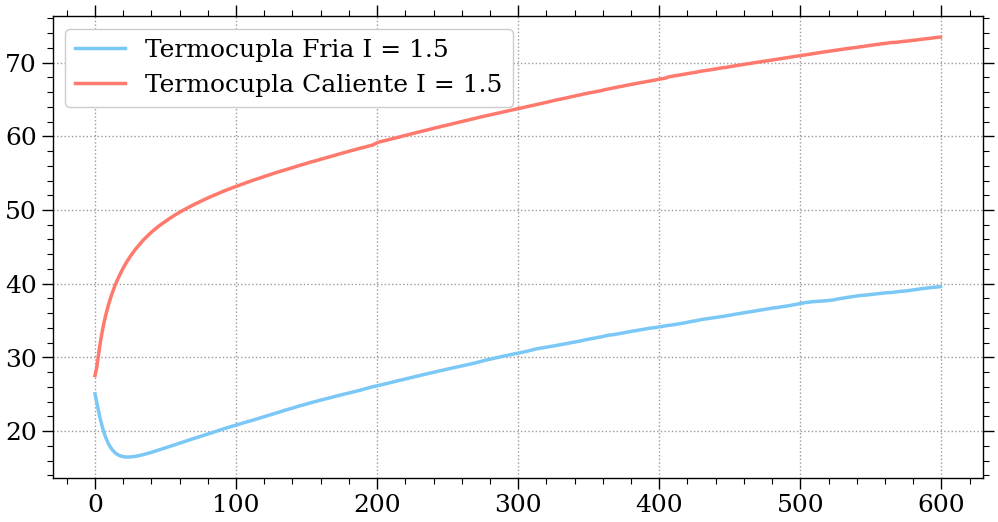

In [11]:
df = pd.read_csv(f'Mediciones/Clase 3/celda_tvsV_I=1.5.csv')
t       =   df['Tiempo [s]'].values
v       =   df['Tension generador [V]'].values
tf =   df['Tensión termocupla fria [V]'].values*1e3
tc =   df['Tensión termocupla caliente [V]'].values*1e3
tf = tf*22.619 + 28.0634
tc = tc*22.671 + 28.0135
delta_t = tc-tf
fig, ax = plt.subplots()

ax.plot(t,tf,label = f'Termocupla Fria I = {1.5}', color = 'C1')
ax.plot(t,tc, label = f'Termocupla Caliente I = {1.5}', color = 'C3')
ax.legend() 

Text(0, 0.5, 'Temperatura [°C]')

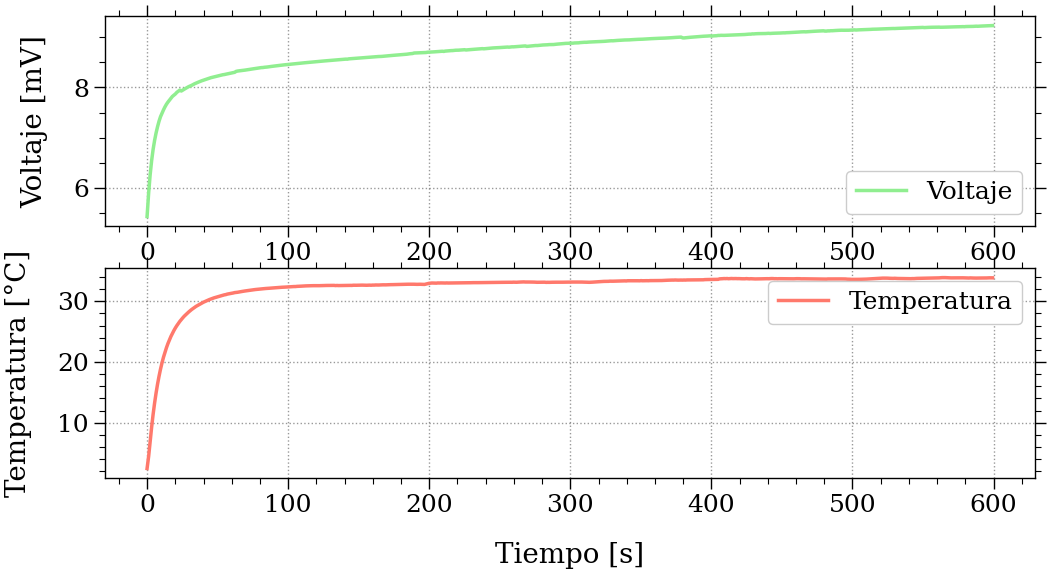

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(t,v,label = f'Voltaje')
ax[0].legend()
ax[0].set_xlabel('Tiempo [s]')
ax[0].set_ylabel('Voltaje [mV]')
ax[1].plot(t,delta_t,label = f'Temperatura',color = 'C3')
ax[1].legend()
ax[1].set_xlabel('Tiempo [s]')
ax[1].set_ylabel('Temperatura [°C]')


In [115]:
ti = 470
tf = 600
d2      =   df[(df['Tiempo [s]']>ti) & (df['Tiempo [s]']<tf)]
t_100       =   d2['Tiempo [s]'].values
v_100       =   d2['Tension generador [V]'].values
tf_100 =   d2['Tensión termocupla fria [V]'].values*1e3
tc_100 =   d2['Tensión termocupla caliente [V]'].values*1e3
tf_100 = tf_100*22.619 + 28.0634
tc_100 = tc_100*22.671 + 28.0135
delta_t_100 = tc_100-tf_100

# fig, ax = plt.subplots(2,1)
# ax[0].plot(t_100,tf_100,label = f'Termocupla Fria I = {1.5}', color = 'C1')
# ax[0].plot(t_100,tc_100, label = f'Termocupla Caliente I = {1.5}', color = 'C3')
# ax[0].legend() 
# ax[0].set_title(f'$T_c \, y\, T_f \, para \, t>100s$')
# ax[1].plot(t_100,tc_100-tf_100,label = f'$\Delta T$')
print(f'En {((600-500)/60):.2f}  minutos, la difrencia de termperatura fue {((tc_100[-1]-tf_100[-1])-(tc_100[0]-tf_100[0])):.6f} °C')
print(len(v_100))

En 1.67  minutos, la difrencia de termperatura fue 0.162033 °C
124


9.176 mV
R = 6.117 Ohm


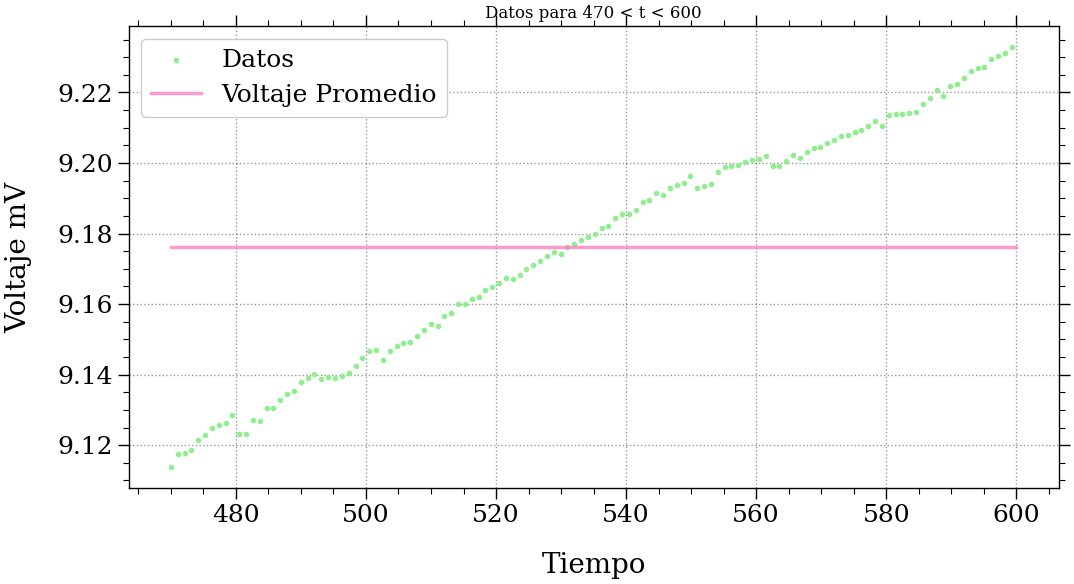

In [122]:
fig, ax = plt.subplots()
ax.set_title(f'Datos para {ti} < t < {tf}')
ax.set_xlabel(f'Tiempo')
ax.set_ylabel(f'Voltaje mV')
ax.scatter(t_100,v_100,marker = '.',label = 'Datos')
x = np.linspace(ti,tf,len(v_100))
v_avg = np.average(v_100)
vx = np.ones(len(v_100))*v_avg
print(f'{v_avg:.3f} mV')
print(f'R = {(v_avg/1.5):.3f} Ohm')
ax.plot(x,vx,color = 'C7',label = 'Voltaje Promedio',alpha = 0.8)
ax.legend()

[0.6840222  0.64470877 0.63952081 0.62925684 0.59825692 0.58491409
 0.56286757 0.55339054 0.54655937 0.52122604 0.58072451 0.58105525
 0.53576361 0.54016976 0.50052827 0.4993175  0.47312786 0.455749
 0.44695187 0.41958066 0.40485695 0.39299322 0.40804306 0.4017809
 0.40496681 0.40123162 0.3916752  0.36784698 0.34315225 0.32066318
 0.32033415 0.35127273 0.32154061 0.30717458 0.29621091 0.29303189
 0.27396202 0.25555662 0.23858143 0.24318059 0.21384081 0.2042106
 0.17708087 0.17533107 0.16122553 0.15357303 0.13313564 0.12210074
 0.11161437 0.09698082 0.0985095  0.08584472 0.06619881 0.05441497
 0.04208855 0.02703917 0.01471949 0.02213274 0.00162937 0.01034658
 0.02233026 0.03213296 0.04204261 0.05978797 0.06675375 0.08840677
 0.10113306 0.10211187 0.11472594 0.13896645 0.14483458 0.16677963
 0.16015368 0.18220057 0.19088633 0.19707401 0.21877909 0.18089758
 0.18947499 0.19457731 0.23006201 0.24611407 0.25099374 0.25175275
 0.26151051 0.26964052 0.27115797 0.28004499 0.25142746 0.25066844

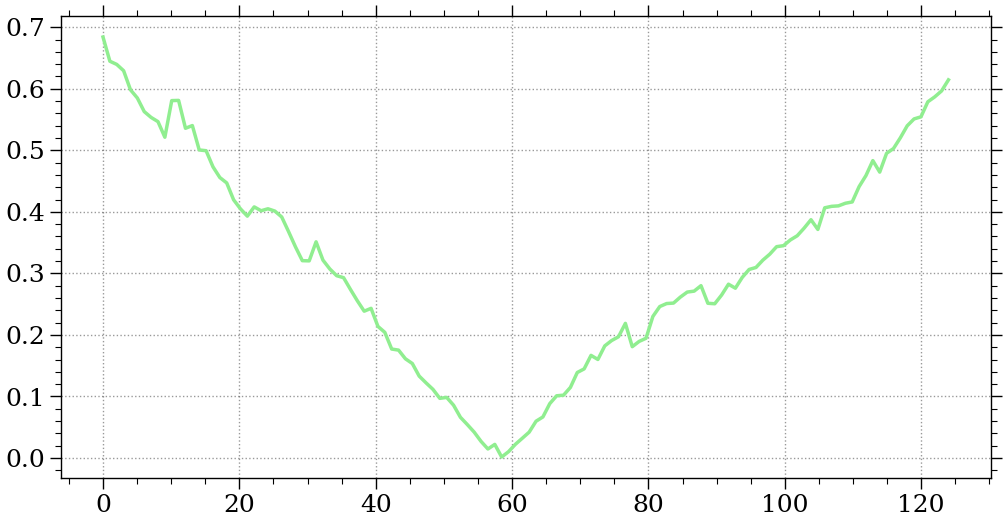

In [129]:
verr = (abs(v_100 - vx))/v_100
x = np.linspace(0,len(verr),len(verr))
print(verr*100)
plt.plot(x,verr*100)

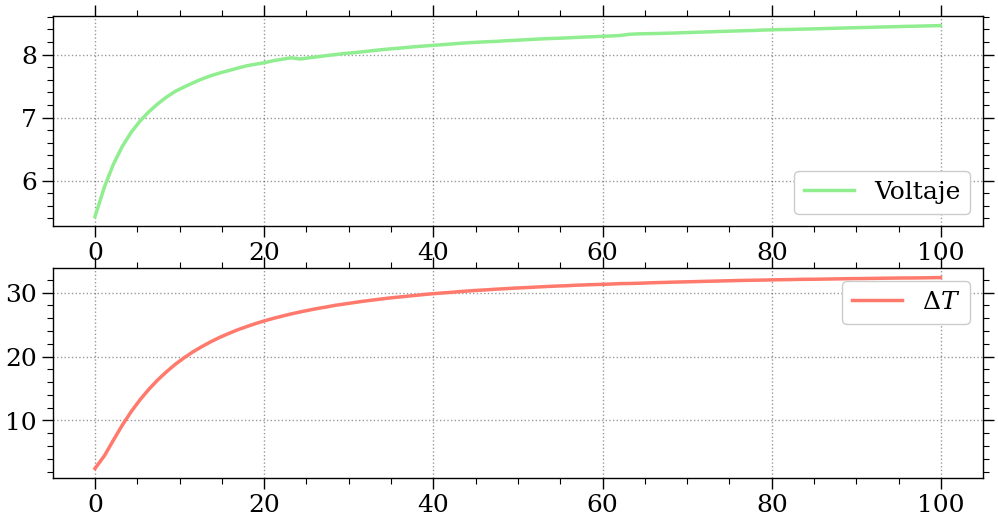

In [65]:
d3       =   df[df['Tiempo [s]']<100]
t_3      =   d3['Tiempo [s]'].values
v_3      =   d3['Tension generador [V]'].values
tf_3 =   d3['Tensión termocupla fria [V]'].values*1e3
tc_3 =  d3['Tensión termocupla caliente [V]'].values*1e3
tf_3 = tf_3*22.619 + 28.0634
tc_3 = tc_3*22.671 + 28.0135
delta_t3 = tc_3 - tf_3

fig, ax = plt.subplots(2,1)

ax[0].plot(t_3,v_3,label = f'Voltaje')
ax[0].legend()
ax[1].plot(t_3,delta_t3,label = f'$\Delta T$',color = 'C3')
ax[1].legend()

[ 11.72666257 -66.32581534]
[[ 0.02836951 -0.22804275]
 [-0.22804275  1.84158779]]
[0.16843251 1.35705114]


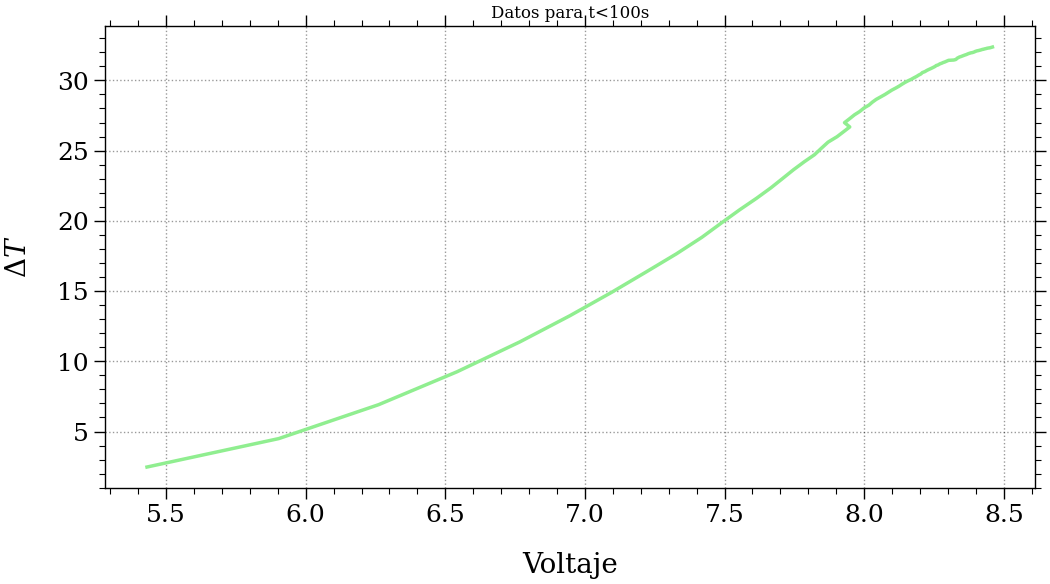

In [66]:
fig, ax = plt.subplots()
ax.plot(v_3,delta_t3)

def lineal(V,a,b):
    return a*V + b
ax.set_title(f'Datos para t<100s')
ax.set_xlabel(f'Voltaje')
ax.set_ylabel(f'$\Delta T$')
popt, pcov = curve_fit(lineal,v_3,delta_t3)
print(popt)
print(pcov)
print(np.sqrt(np.diag(pcov)))

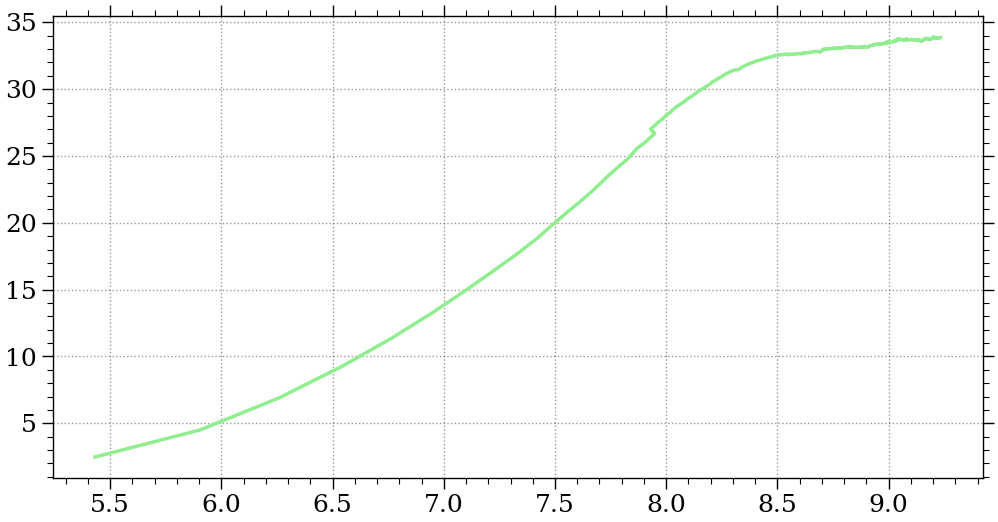

In [3]:
df = pd.read_csv(f'Mediciones/Clase 3/celda_tvsV_I=1.5.csv')
t       =   df['Tiempo [s]'].values
v       =   df['Tension generador [V]'].values
tf =   df['Tensión termocupla fria [V]'].values
tc =   df['Tensión termocupla caliente [V]'].values
delta_t = []

tf = tf*1e3 #Pasa el valor a mV
tc = tc*1e3
tf_temp = tf*22.619 + 28.0634 #Pasa el valor a temperatura [C]
tc_temp = tc*22.671 + 28.0135
delta_t = tc_temp - tf_temp

# falta:
# errores en delta t (propagación con los errores de las termocuplas)
# errores en v (los del multímetro)
# ajuste (con min cuad)
# ver de seleccionar una parte que parezca lineal + comparar con lo de fische

def lineal(x, m, b):
    return m*x + b


In [ ]:
# una vez que esté coef de seebeck:
# def cuenta_R(v, a, I, delta_t):
#     R = (v-a*delta_t)
#     return R